# Twitter Workbook

# Twitter Sentiment Analysis

This notebook aims to predict whether a person does or does not intend to get the COVID-19 vaccine by looking at Tweets.

In [1]:
import tweepy
import webbrowser
import time

import pandas as pd

from tweepy import OAuthHandler
from tweepy import API


# auth.set_access_token(access_token, access_token_secret)



In [2]:
consumer_key = 'bWejmjpTvWNkCiwpixz4iYxGK'
consumer_secret = 'Yambe1a5bWbsPoyKQg8MeQzdVHlcjnXzIm6k7uGDPsKvxyDki7'

In [3]:
access_token = '1374027292867969025-BcTPabYKmlcKQHZCkoXbZ2BvXXcbNs'
access_token_secret = 'STtqBirnsLcjoVkkRbtIpWLb55hTtyw6dJus8kwaxaqha'

In [4]:
callback_uri = 'oob'

In [5]:
auth = OAuthHandler(consumer_key, consumer_secret, callback_uri)
auth.set_access_token(access_token, access_token_secret)
# redirect_url = auth.get_authorization_url()

In [6]:
# webbrowser.open(redirect_url)

NameError: name 'redirect_url' is not defined

In [ ]:
# user_pin_input = input("What's the pin value? ")

In [7]:
# auth.get_access_token(user_pin_input)

NameError: name 'user_pin_input' is not defined

In [8]:
api = API(auth, wait_on_rate_limit= True)

In [9]:
me = api.me()
print(me.screen_name)

cassienutter1


get text from your timeline into pandas

In [10]:
my_timeline = api.home_timeline()

In [11]:
print(my_timeline)

[]


In [13]:
columns = set()
allowed_types = [str, int]
tweet_data = []

for status in my_timeline:
#     print(status.text)
#     print (type(vas(status)))
    status_dict = dict(vars(status))
    keys = status_dict.keys()
    single_tweet_data = {}
    for k in keys:
        try:
            v_type = type(status_dict['k'])
        except:
            v_type = None
            
        if v_type != None:
            if v_type in allowed_types:
                single_tweet_data[k] = status_dict[k]
                columns.add(k)
    tweets_data.append(single_tweet_data )
        
header_cols = list(columns)

In [14]:
df = pd.DataFrame(tweet_data, columns= header_cols)
df.head()

""


In [17]:
#. get_status?

user = api.get_user('code')
user_timeline = user.timeline()
df2 = extract_timeline_as_df(user_timeline)
df2.head()

,retweet_count,lang,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,source_url,in_reply_to_status_id,id,text,favorite_count,quoted_status_id_str,quoted_status_id,source,id_str,in_reply_to_user_id,author
0,0,en,1377701530200113155,3323218917,satyalumesh,https://about.twitter.com/products/tweetdeck,1.377702e+18,1377709350337146882,@satyalumesh Not that I know of. But last week...,2,NaN,NaN,TweetDeck,1377709350337146882,3.323219e+09,code
1,18,en,NaN,NaN,NaN,https://buffer.com,NaN,1377685949405138944,RT @jongallant: If GitHub Codespaces in the br...,0,NaN,NaN,Buffer,1377685949405138944,NaN,code
2,0,en,1377632054339379204,1352047281726517248,codexpath2,https://about.twitter.com/products/tweetdeck,1.377632e+18,1377663896710901760,@codexpath2 @thecodercoder We have info here t...,0,NaN,NaN,TweetDeck,1377663896710901760,1.352047e+18,code
3,138,en,NaN,NaN,NaN,https://buffer.com,NaN,1377648956843433986,"Copying and pasting from… I mean, consulting S...",570,1376671673320083459,1.376672e+18,Buffer,1377648956843433986,NaN,code
4,7,en,NaN,NaN,NaN,https://buffer.com,NaN,1377380687808847872,RT @nitecoda1: Ever forgotten to import one of...,0,NaN,NaN,Buffer,1377380687808847872,NaN,code


In [16]:
def extract_timeline_as_df(timeline_list):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    for status in timeline_list:
        status_dict = dict(vars(status))
        keys = status_dict.keys()
        single_tweet_data = {"user": status.user.screen_name, "author": status.author.screen_name}
        for k in keys:
            try:
                v_type = type(status_dict[k])
            except:
                v_type = None
            if v_type != None:
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]
                    columns.add(k)
        tweets_data.append(single_tweet_data)


    header_cols = list(columns)
    header_cols.append('author')
    df = pd.DataFrame(tweets_data, columns=header_cols)
    return df

In [ ]:
df3 = extract_timeline_as_df(user_timeline)

In [ ]:
df3.head()

In [ ]:
status_obj = api.get_status('1247966976951058433')
status_obj.text

In [ ]:
print(status_obj.geo)

In [ ]:
len(api.home_timeline())

In [ ]:
other_user = 'therock'
for i, status in enumerate(tweepy.Cursor(api.user_timeline, screen_name = other_user).items(20)):
    print (i, status.text)

In [ ]:
api.

In [ ]:
# query = '#vaccine'
# api.search(q = query)

In [ ]:
query = '#vaccine covid'
for i, status in enumerate(tweepy.Cursor(api.search, q= query).items(50)):
    print (i, status.text)

In [18]:
cursor = tweepy.Cursor(api.user_timeline, id= 'code', tweet_mode = 'extended').items(1)

In [19]:
for i in cursor:
    print(dir(i))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


In [20]:
cursor = tweepy.Cursor(api.user_timeline, id= 'code', tweet_mode = 'extended').items(1)

In [21]:
for i in cursor:
    print(i.full_text, i.lang, i.geo)

@satyalumesh Not that I know of. But last week we had a livestream with folks from @Tabnine_ and @ShinanYotam had some thoughts on that 🙊 https://t.co/Cg2Yb71vZ4 en None


In [24]:
cursor = tweepy.Cursor(api.search, q= 'vaccine', tweet_mode = 'extended').items(6)

In [25]:
for i in cursor:
    print(i.full_text, i.lang, i.geo)

@HBarca5 @GovMikeDeWine Um...hospital employee mandated to get the flu vaccine EVERY SINGLE YEAR. Covid vaccine should be no different. en None
RT @drsimonegold: .@GovRonDeSantis announced that he will take executive action this week against vaccine passports.

Every governor in Ame… en None
RT @HumanRights4UK: We must universally and TOTALLY reject "vaccine passports" at all costs. They will create a worldwide digital surveilla… en None
@BogochIsaac @CKKellyMartin @fordnation I signed my up a week ago to be notified about vaccine appointments at a pharmacy in Sharbot Lake (the closest option to Ottawa at the time). They still haven't contacted her. en None
May nabili bang @pfizer vaccine ang matandang inutil na damuhong batugang tumor ni satanas?

Si #galvezInutil, may na-pirmahan na bang supply agreement sa mga vaccine manufacturers?

#DutertePalpak
#dutertaeInutil
#IMPEACHdutertae
#OustDuterteNOW
#Oustduterte2021
#Oustdu30 https://t.co/t87Vm8LSKk tl None
RT @WSJ: The U.K.’s bold cal

In [59]:
number_of_tweets = 5
tweets = []
language = []
time = []

for i in tweepy.Cursor(api.search, q= 'vaccine covid -RT',  tweet_mode = 'extended', include_rts= False).items(number_of_tweets):
    tweets.append(i.full_text)
    language.append(i.lang)
    time.append(i.created_at)


In [60]:
df = pd.DataFrame({'time': time, 'language': language, 'tweets': tweets})

In [61]:
df

,time,language,tweets
0,2021-04-01 21:23:44,en,@RealNormalPod Someone posted a letter they'd ...
1,2021-04-01 21:23:42,en,check out this article everybody and please re...
2,2021-04-01 21:23:42,und,https://t.co/aJyl4WOsfl
3,2021-04-01 21:23:41,en,Made my first covid vaccine appointment let’s ...
4,2021-04-01 21:23:38,en,COVID-19 Vaccine Clinics Now Open to all #Indi...


In [37]:
df = df[~df.tweets.str.contains('RT')]

In [39]:
df.reset_index(drop= True, inplace= True)

In [69]:
df.to_csv('tweets.csv', mode= 'a', index= False, header= False)

In [64]:
df2 = pd.read_csv('tweets.csv')
df2

,Unnamed: 0,time,language,tweets
0,0,2021-04-01 21:23:44,en,@RealNormalPod Someone posted a letter they'd ...
1,1,2021-04-01 21:23:42,en,check out this article everybody and please re...
2,2,2021-04-01 21:23:42,und,https://t.co/aJyl4WOsfl
3,3,2021-04-01 21:23:41,en,Made my first covid vaccine appointment let’s ...
4,4,2021-04-01 21:23:38,en,COVID-19 Vaccine Clinics Now Open to all #Indi...


In [65]:
number_of_tweets = 5
tweets = []
language = []
time = []

for i in tweepy.Cursor(api.search, q= 'vaccine covid -RT',  tweet_mode = 'extended', include_rts= False).items(number_of_tweets):
    tweets.append(i.full_text)
    language.append(i.lang)
    time.append(i.created_at)

In [66]:
df3 = pd.DataFrame({'time': time, 'language': language, 'tweets': tweets})
df3

,time,language,tweets
0,2021-04-01 21:37:39,en,I can’t believe I just saw a title saying “cov...
1,2021-04-01 21:37:37,en,Don't freak out if you get these side effects ...
2,2021-04-01 21:37:35,en,"Hello ⁦@drpatesblog⁩, this is the second artic..."
3,2021-04-01 21:37:34,en,"Thing is, I’m not even anti vax or anything an..."
4,2021-04-01 21:37:31,en,i got my covid vaccine besties 😁 https://t.co/...


In [67]:
df3.to_csv('tweets.csv', index= False)

In [70]:
# pip install googletrans

     |████████████████████████████████| 55 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 994 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 4.2 MB/s eta 0:00:01
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=ad1fd53af6e10629362e7cd2aeb3e1a74783e5f3f5ba1465e11eea204507faf7
  Stored in directory: /Users/cassienutter/Library/Caches/pip/wheels/0e/ce/9b/d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans
Note: you may need to restart the kernel to use updated packages.


In [76]:
df = pd.read_csv('tweets.csv')

In [83]:
lang_df = df.sort_values('language')

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

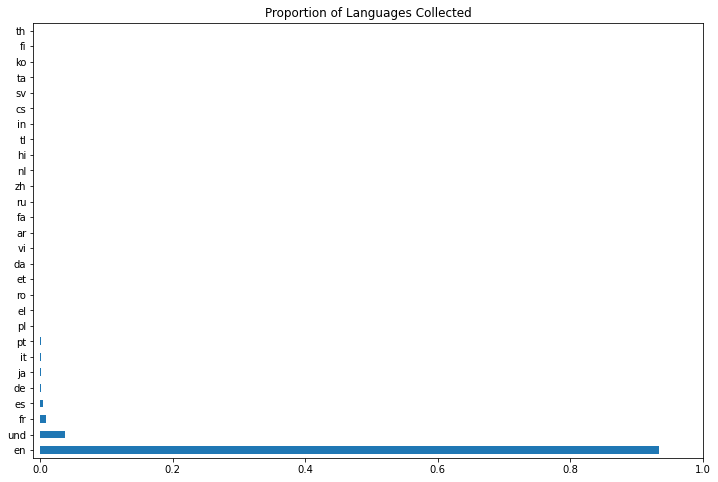

In [99]:
plt.figure(figsize= (12, 8))
lang_df.language.value_counts(normalize=True).plot(kind= 'barh')
plt.title('Proportion of Languages Collected')
plt.xlim(-.01, 1)
plt.show()

In [ ]:
lang_df.language.value_counts(normalize=True)